In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from pylab import rcParams
import seaborn as sns

# some settings
%matplotlib inline
%config InlineBackend.figure_format='retina'

rcParams['figure.figsize'] = 14, 10

In [121]:
models = ['ann', 'rnn', 'gru', 'lstm']
#models = ['lstm']

res = None

for model in models:
    plot_data = pd.read_csv(f'data/results/ser/r14loops/{model}.csv', sep=';')
    #sns.scatterplot(x="hl", y="rmse", data=plot_data, color = 'red');
    plot_data['model'] = pd.Series([model for i in range(len(plot_data))]) 
    if res is None:
        res = plot_data
    else:
        res = pd.concat([res, plot_data])

for model in models:
    plot_data = pd.read_csv(f'data/results/SSA/ser/r2loops/{model}.csv', sep=';')
    #sns.scatterplot(x="hl", y="rmse", data=plot_data, color = 'black');
    plot_data['model'] = pd.Series(['ssa-' + model for i in range(len(plot_data))]) 
    if res is None:
        res = plot_data
    else:
        res = pd.concat([res, plot_data])

In [122]:
# markers = [".", ".", ".", ".", "s", "s", "s", "s",]

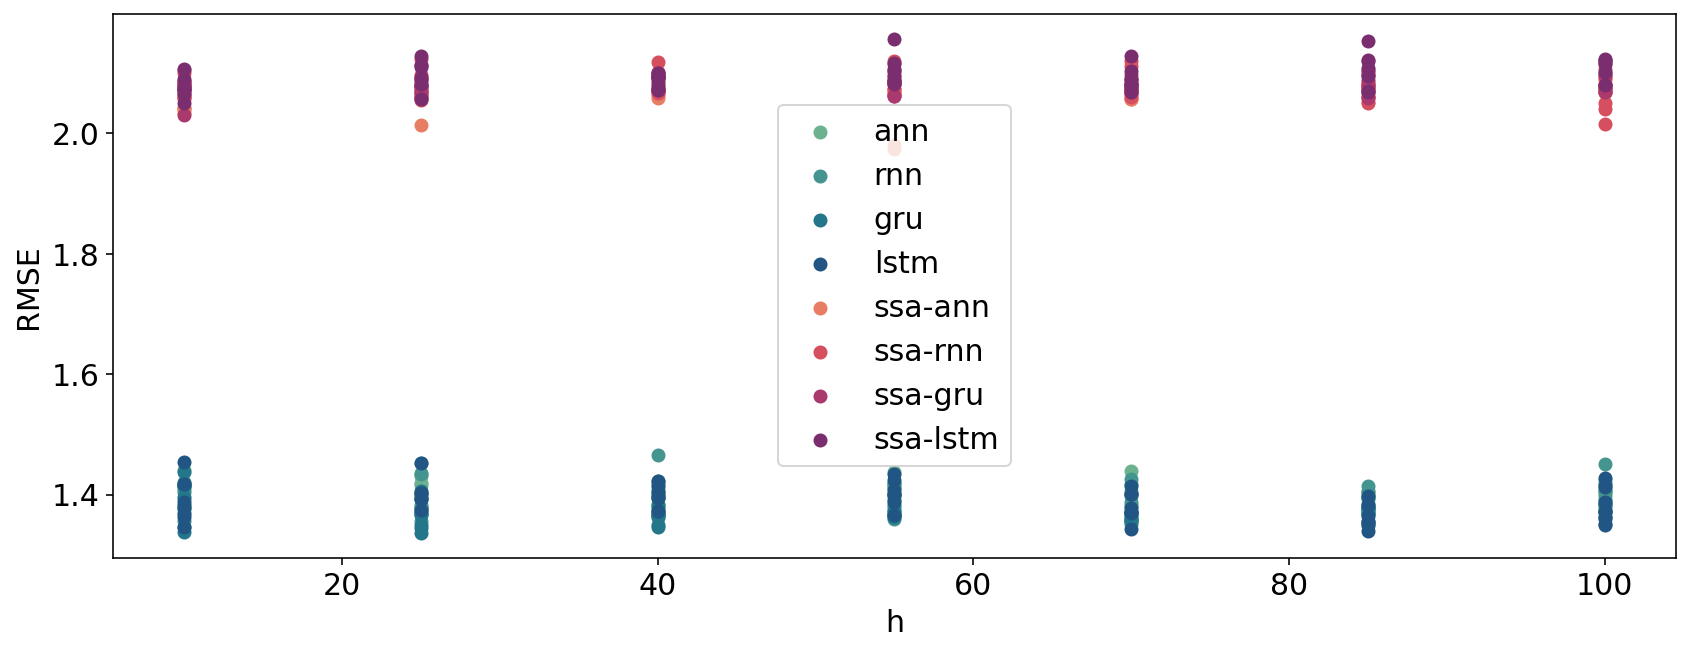

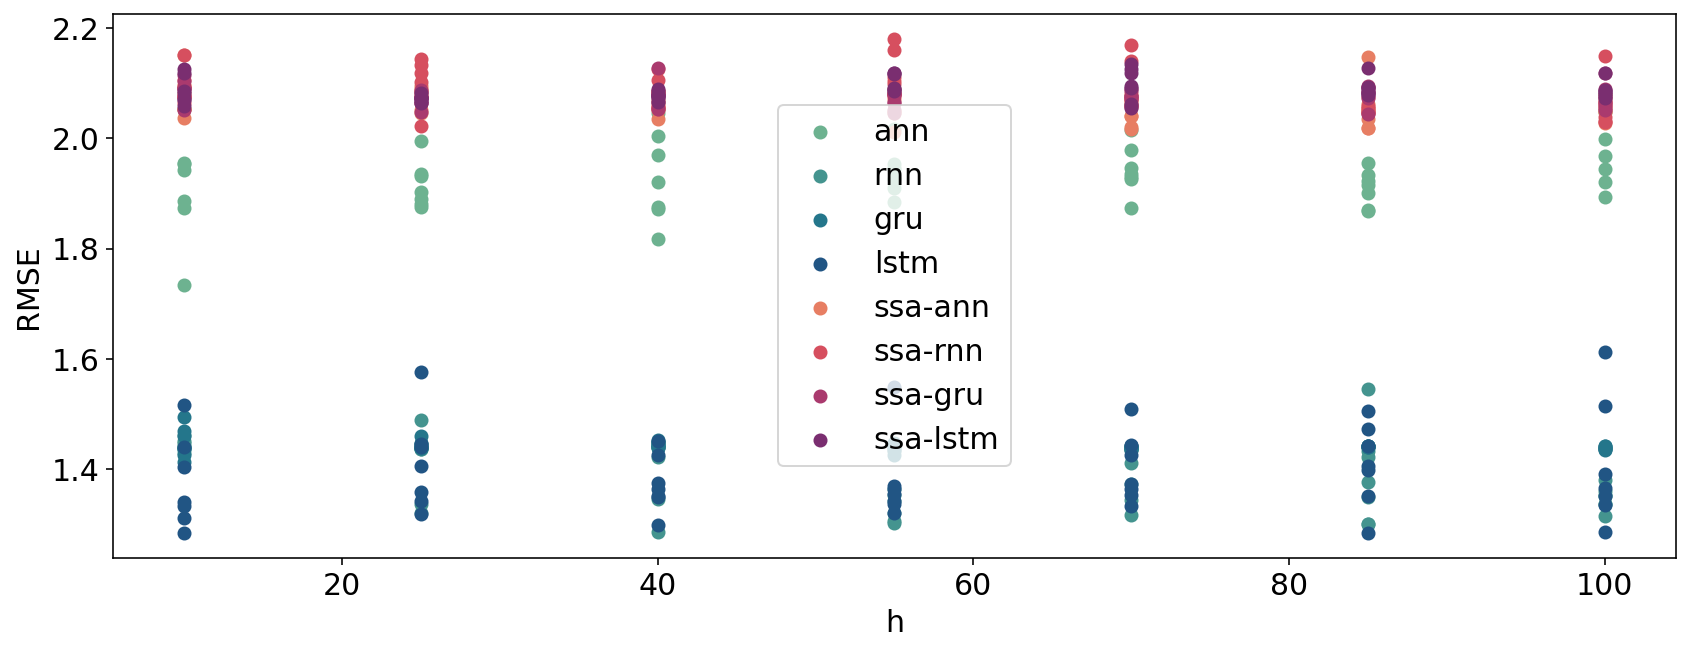

In [123]:
#plt.figure(figsize=(14,5))
T_sizes = [12, 84]
for T_size in T_sizes:
    plot_data = res[res['T']==T_size] 
    f, ax = plt.subplots(1, 1, figsize = (14,5))
    #plt.figure(figsize=(14,5))
    plt.xlabel('h', fontsize=15)
    plt.ylabel('RMSE', fontsize=15)
    
    
    for i, m in enumerate(plot_data.model.unique()):
        ax.scatter(plot_data[plot_data.model == m]['hl'], plot_data[plot_data.model == m].rmse, color=p[i], label=m)

    ax.legend()
    plt.show()
    
    # sns.scatterplot(x="hl", y="rmse", data=plot_data, hue='model', palette = p);
    # plt.legend(fontsize=15)
    # plt.show()

In [124]:
#plot_data = np.array(results['rnn'])
model = 'lstm'
plot_data = pd.read_csv(f'data/results/SSA/indian_rain/{model}.csv', sep=';')
sns.scatterplot(x="hl", y="rmse", data=plot_data, hue='RS', palette = 'flare');

FileNotFoundError: [Errno 2] No such file or directory: 'data/results/SSA/indian_rain/lstm.csv'

In [ ]:
def collectPlotData(path, folder, names):
    seq_lens = list(range(12, 500, 36))

    results = {}

    x_except = set()
    for name in names:
        lSeries = []

        for sl in seq_lens:
            data_signal = None
            try:
                data_signal = np.loadtxt(f'{path}{folder}/{sl}/{name}_series.txt')
            except OSError:
                x_except.add(sl)
                print(f"Can't open {sl} folder, {name} method")

            lSeries.append(data_signal)

        results.update({name : lSeries})
        
    return results

def getDataFrameFromDict(results, name):
    plot_data = np.array(results[name])
    res = []
    for i in range(len(plot_data.T)):
        for k, x in enumerate(plot_data.T[i]):
            res.append([x, 12 + k*36, 10 + i*15])
    return pd.DataFrame(res, columns=['rmse', 'T', 'hidden layer'])

In [3]:
path = 'data/results/'
folder = 'indian_rain/'
names = ['ann','rnn','gru','lstm']

values = []

for name in names:
    dPlotData = pd.read_csv(f'{path}{folder}{name}.csv', sep = ';')
    top3_hl = dPlotData.groupby('hl').mean().sort_values('rmse').index[:3]
    print(top3_hl)
    top3_df = dPlotData.loc[dPlotData['hl'].isin(top3_hl)]
    for i, rmse_value in enumerate(top3_df.groupby('T').mean().rmse.values):
        values.append([rmse_value, name, top3_df.groupby('T').mean().rmse.index[i]])
        
path += 'SSA/'
for name in names:
    dPlotData = pd.read_csv(f'{path}{folder}{name}.csv', sep = ';')
    top3_hl = dPlotData.groupby('hl').mean().sort_values('rmse').index[:3]
    print(top3_hl)
    top3_df = dPlotData.loc[dPlotData['hl'].isin(top3_hl)]
    for i, rmse_value in enumerate(top3_df.groupby('T').mean().rmse.values):
        values.append([rmse_value, name + '_ssa', top3_df.groupby('T').mean().rmse.index[i]])

plot_data = pd.DataFrame(values, columns = ['rmse', 'model', 'T'])

FileNotFoundError: [Errno 2] No such file or directory: 'data/results/indian_rain/ann.csv'

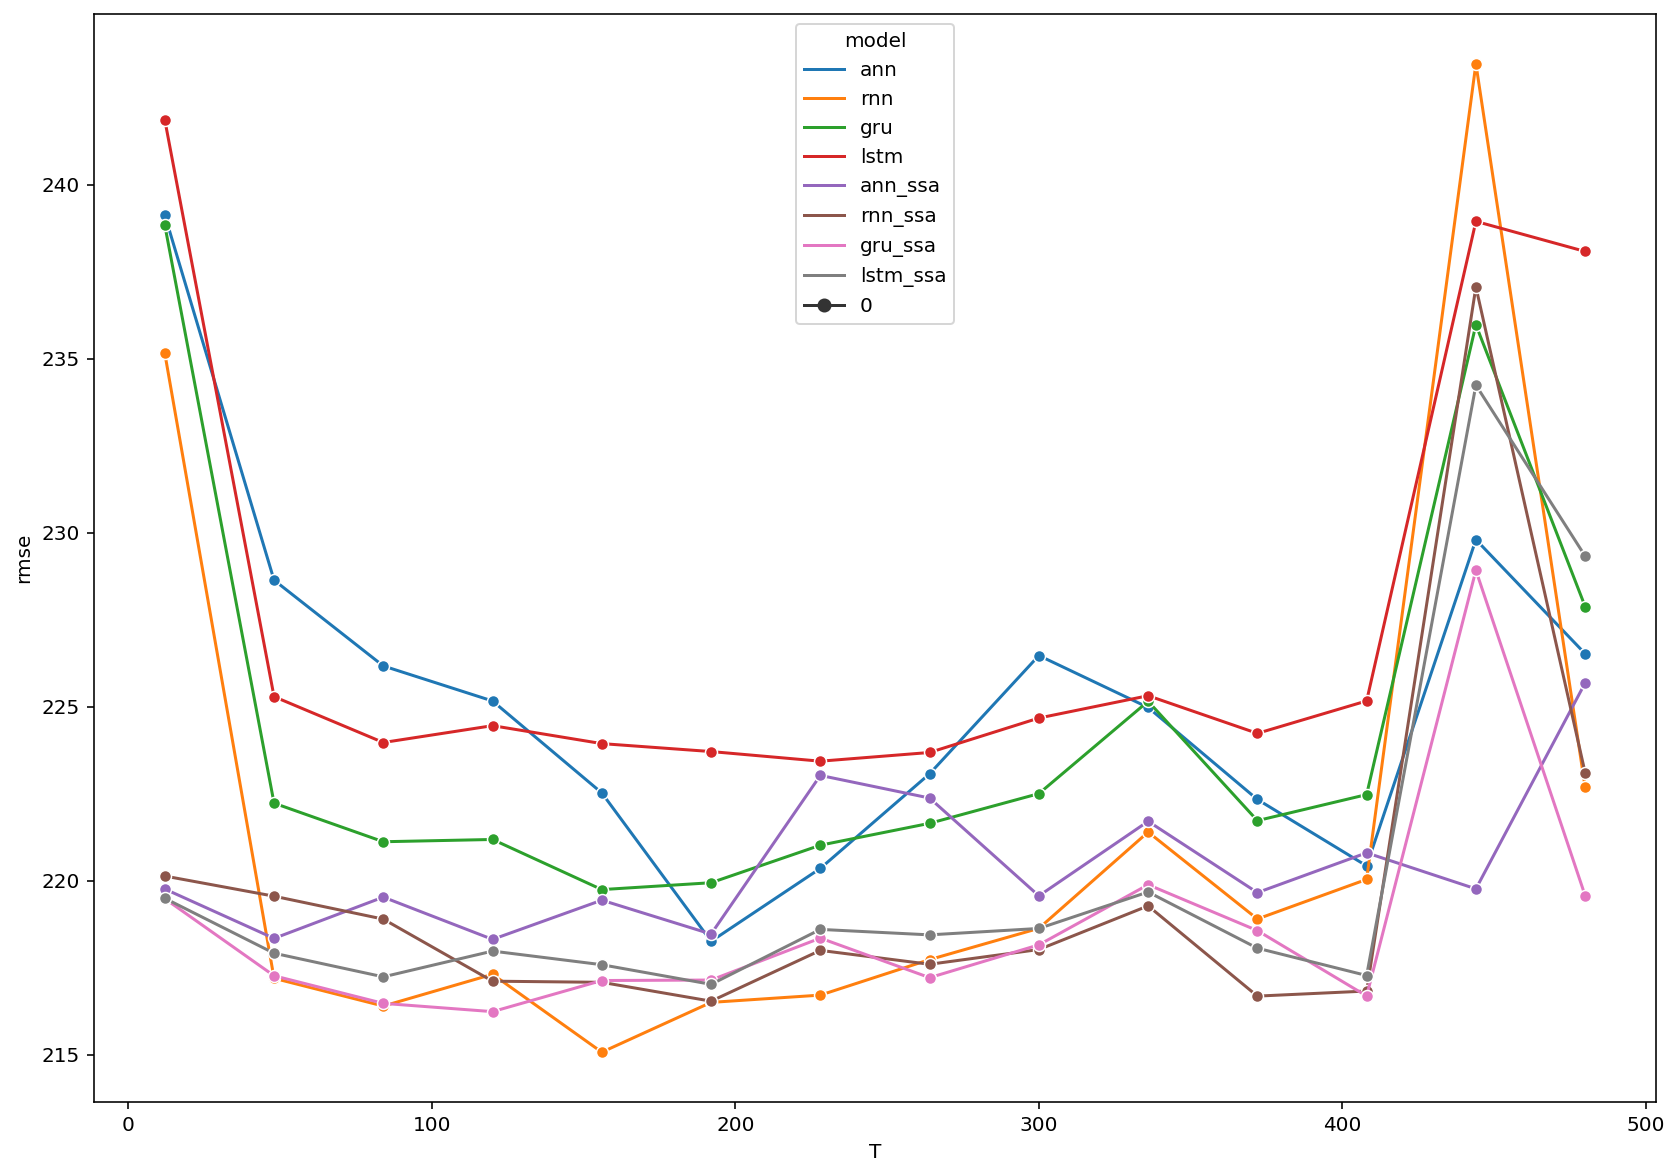

In [9]:
sns.lineplot(x="T", y="rmse", data=plot_data, hue = 'model', style = 0, markers=True);

In [30]:
path = 'data/raw/'
path[:5] + 'SSA/'

'data/SSA/'

***

In [ ]:
plot_data = plot_data[plot_data['T'] != 144]

In [122]:
dPlotData = pd.read_csv(f'{path}{folder}{name}.csv', sep = ';')
dPlotData= dPlotData[dPlotData['T'] != 144]

In [103]:
# path = 'data/raw/'
path = 'data/results/'
folder = 'ser/r14L84/' 
names = ['ann','rnn','gru','lstm']

values = []


groupby_key = 'hl'

for name in names:
    dPlotData = pd.read_csv(f'{path}{folder}{name}.csv', sep = ';')
    dPlotData= dPlotData[dPlotData['T'] != 144]
    for i, rmse_value in enumerate(dPlotData.groupby(groupby_key).mean().rmse.values):
        values.append([rmse_value, name, dPlotData.groupby(groupby_key).mean().rmse.index[i]])
        
# path = path[:5] + 'SSA/'
path += 'SSA/'
for name in names:
    dPlotData = pd.read_csv(f'{path}{folder}{name}.csv', sep = ';')
    dPlotData= dPlotData[dPlotData['T'] != 144]
    for i, rmse_value in enumerate(dPlotData.groupby(groupby_key).mean().rmse.values):
        values.append([rmse_value, 'ssa-'+ name, dPlotData.groupby(groupby_key).mean().rmse.index[i]])

plot_data = pd.DataFrame(values, columns = ['rmse', 'model', groupby_key])

In [104]:
p = sns.diverging_palette(250, 30, l=65, center="dark", n = 8)

In [105]:
raw_p = sns.color_palette("crest",n_colors = 4)

In [106]:
ssa_p = sns.color_palette("flare", n_colors = 4)

In [107]:
p = raw_p + ssa_p

In [108]:
#linestyles=['-','-','-','-','--','--','--','--',]
linestyles = ['-','-','-','-','-','-','-','-',]
markers = ["o", "v", "s", "D", "o", "v", "s", "D",]

In [109]:
# Indian rain: L = половина, r = 7
# x_pole: L = половина, r = 12 

# # x_pole
# ssa_res = {65: 0.021021842451691718,
#  78: 0.02145938976277069,
#  39: 0.016021811890728852,
#  52: 0.018163735297652712,
#  26: 0.009982417393572482}

# # Indian Rain
# ssa_res = {180: 223.788817087436,
#  192: 224.05505464261842,
#  204: 224.0414201562979,
#  168: 223.07204718431257,
#  216: 224.1642503033569}

# ser
ssa_res = {(36, 16): 1.8308863030497065,
 (24, 10): 1.7327355718357502,
 (24, 12): 1.8369393647331844,
 (96, 16): 1.9615531101003072,
 (24, 8): 1.832340703954742}

# # tsSin
# ssa_res = {182: 10.192423720864452,
#  169: 10.212086337965417,
#  195: 10.15785046052862,
#  130: 10.140111829794275,
#  156: 10.347141276747065}

# # weather4
# ssa_res = {120: 5.666157583032649,
#  108: 5.635934028480847,
#  132: 5.615262796625373,
#  72: 5.645488752158603,
#  84: 5.654392011752892}

# # tsSin 620 r = 12 L = LH
# ssa_res = {117: 10.086907490303442,
#  104: 9.967405746824383,
#  143: 10.273373802055417,
#  156: 10.502465965781647,
#  91: 10.086132120539721}

# # edsine r = 2
# ssa_res = {175: 1.7123370140317977}

# # edsine r = 4
# ssa_res = {175: 1.6057291680532535}

# # edsine r = 6
# ssa_res = {175: 1.6521232452698609}

# # edsine 0.3 r = 2
# ssa_res = {132: 0.7891557983830271}

# # edsine 0.3 r = 4
# ssa_res = {132: 0.31861211035118936}

# # edsine 0.3 r = 6
# ssa_res = {132: 0.32798001544429883}

In [110]:
ssa_plt = sns.color_palette("cubehelix", n_colors = 5)

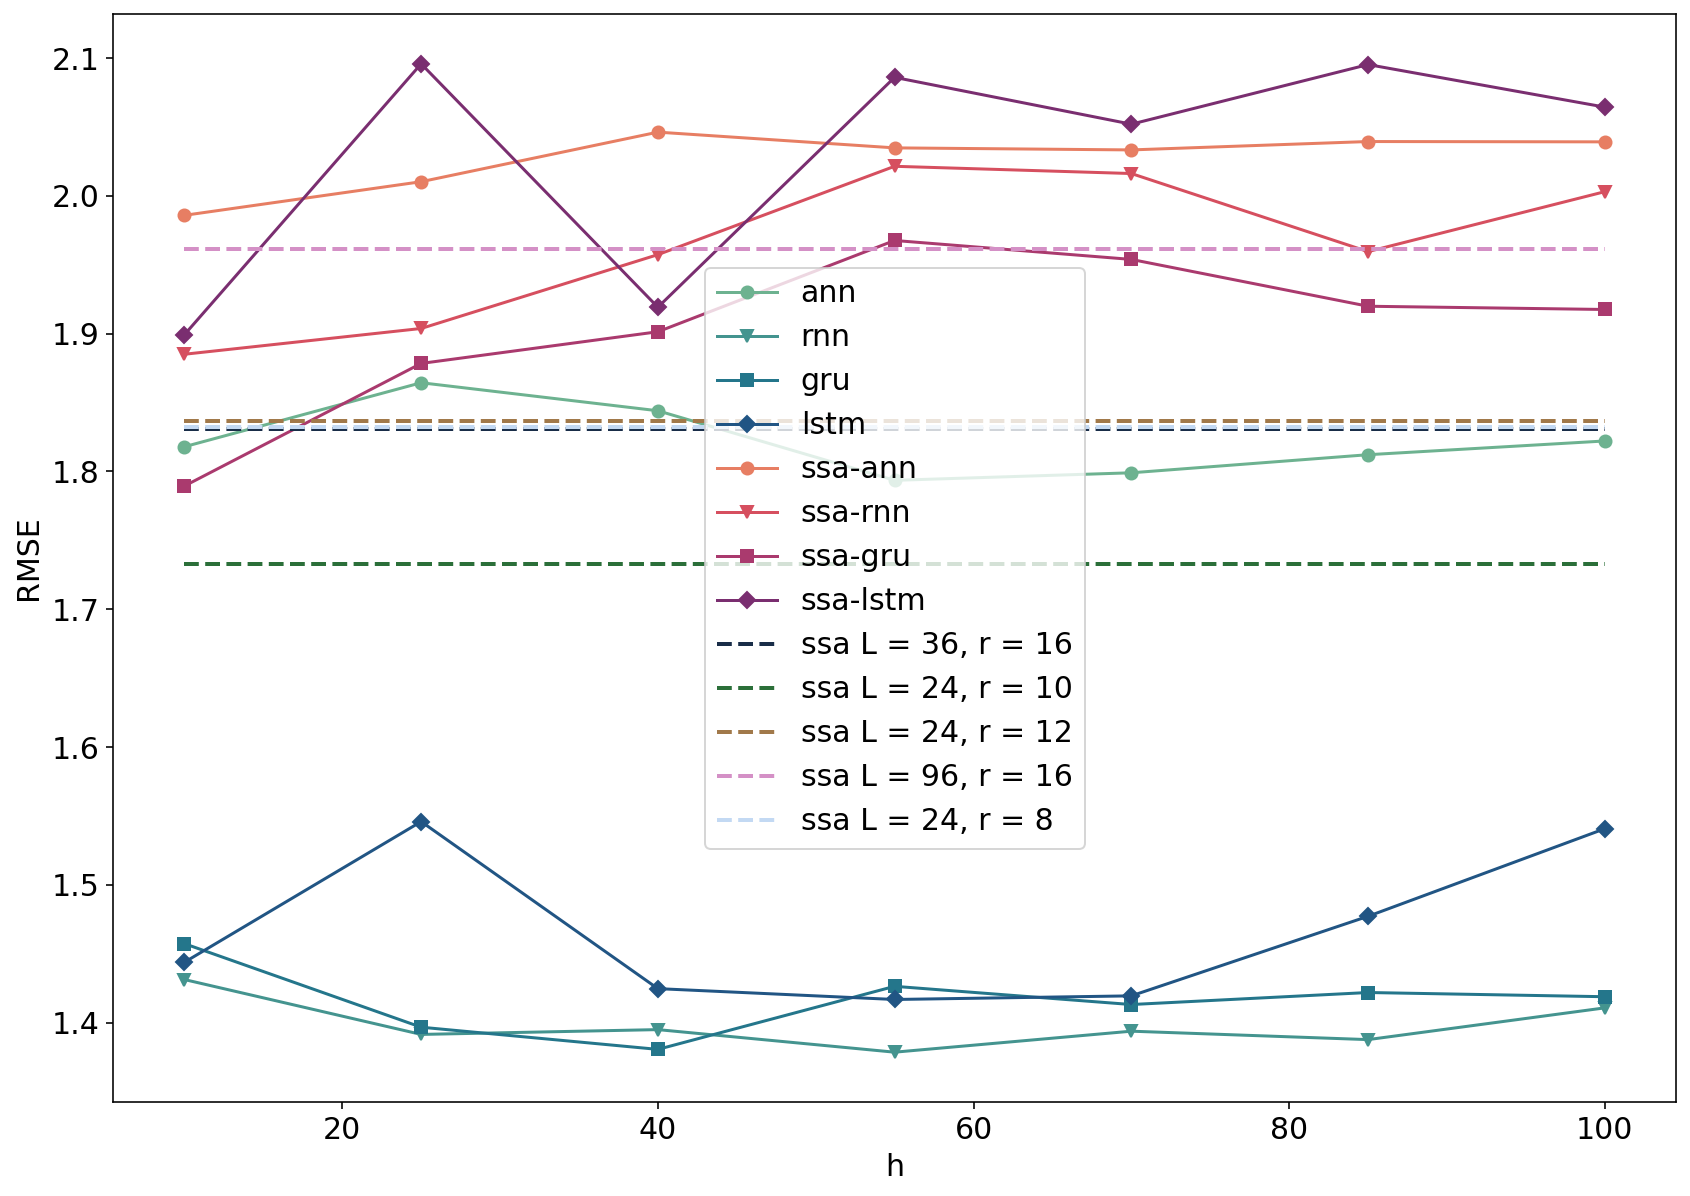

In [111]:
f, ax = plt.subplots(1, 1)
rc('xtick', labelsize=15) 
rc('ytick', labelsize=15)
plt.xlabel('h' if groupby_key == 'hl' else 'T', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
rc('legend',fontsize=15)

for i, m in enumerate(plot_data.model.unique()):
    ax.plot(plot_data[plot_data.model == m][groupby_key], plot_data[plot_data.model == m].rmse, color=p[i], label=m, linestyle=linestyles[i], marker = markers[i])

for i, (k, r) in enumerate(ssa_res.items()):
    ax.hlines(y=r, xmin = plot_data[groupby_key].min(), xmax = plot_data[groupby_key].max(), linewidth=2, color=ssa_plt[i], linestyles = '--', label = f'ssa L = {k[0]}, r = {k[1]}')
ax.legend()

#plt.gcf().autofmt_xdate()
plt.show()

In [110]:
filepath = "data/rain_m.txt"

rain_df = pd.read_csv(filepath, sep = '\t', header=None)
rain = []
for i in range(146):
    rain = rain + [m for m in rain_df.iloc[i]] 

SIZE = 1500;
rain_m = np.array(rain[:SIZE])

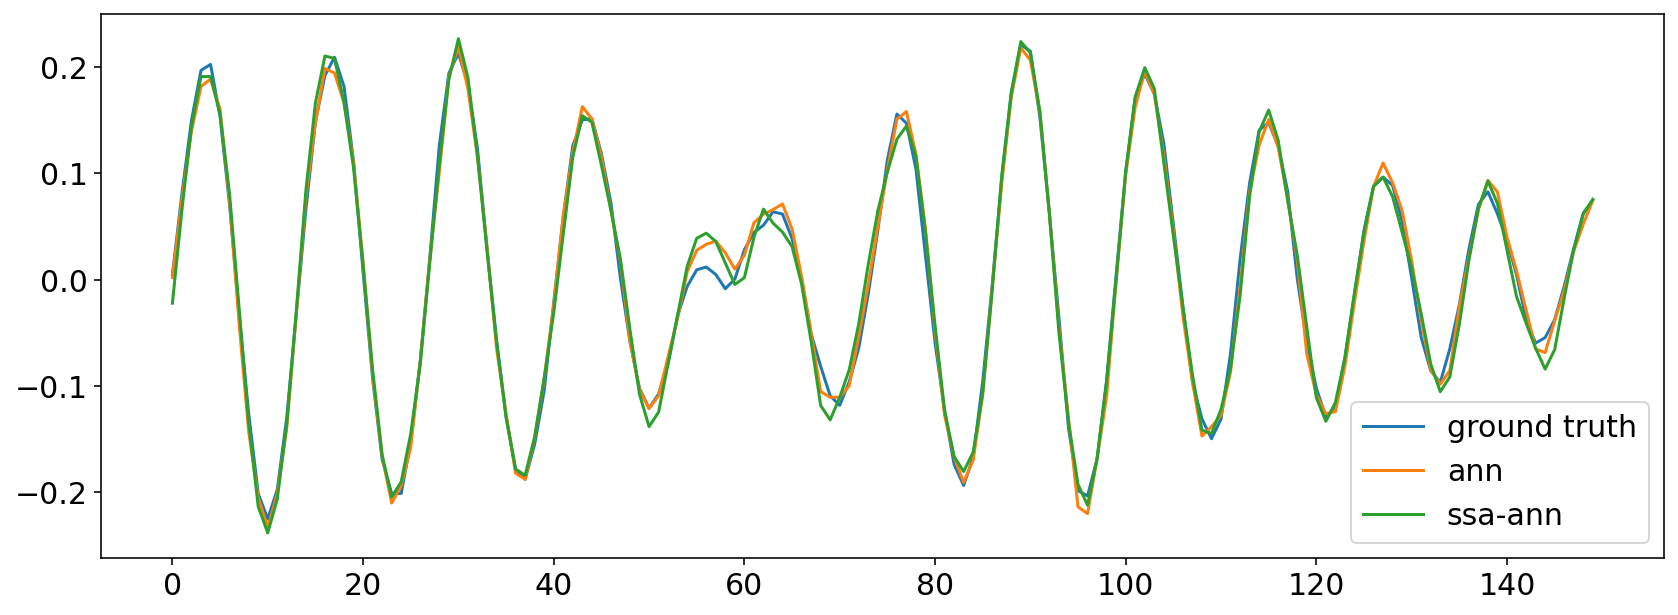

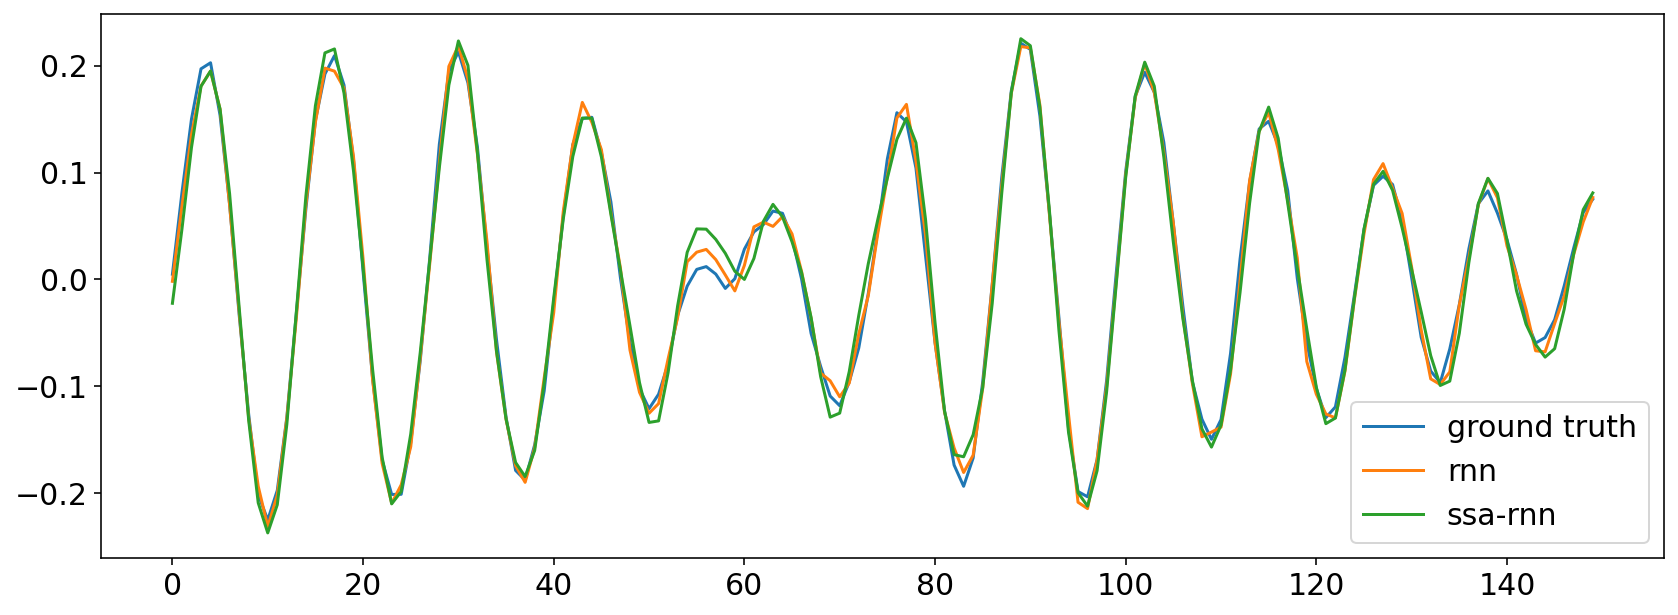

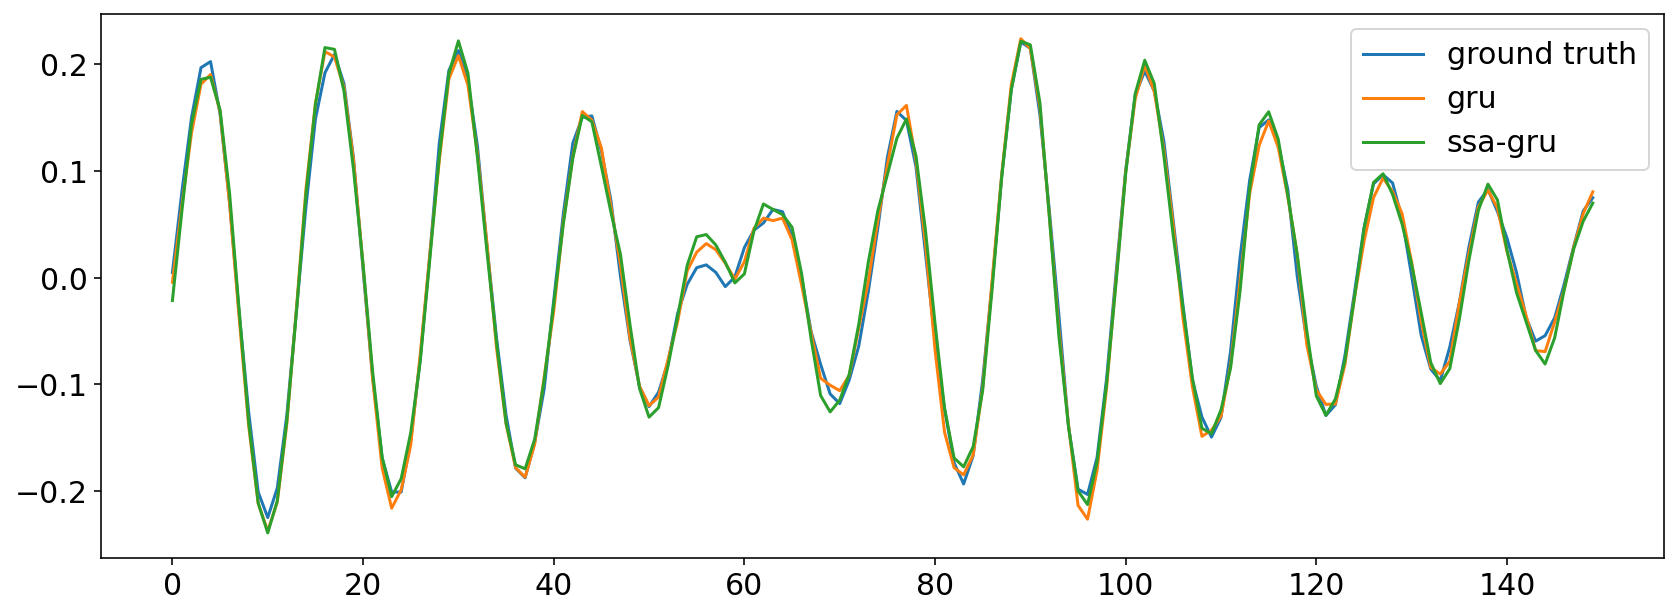

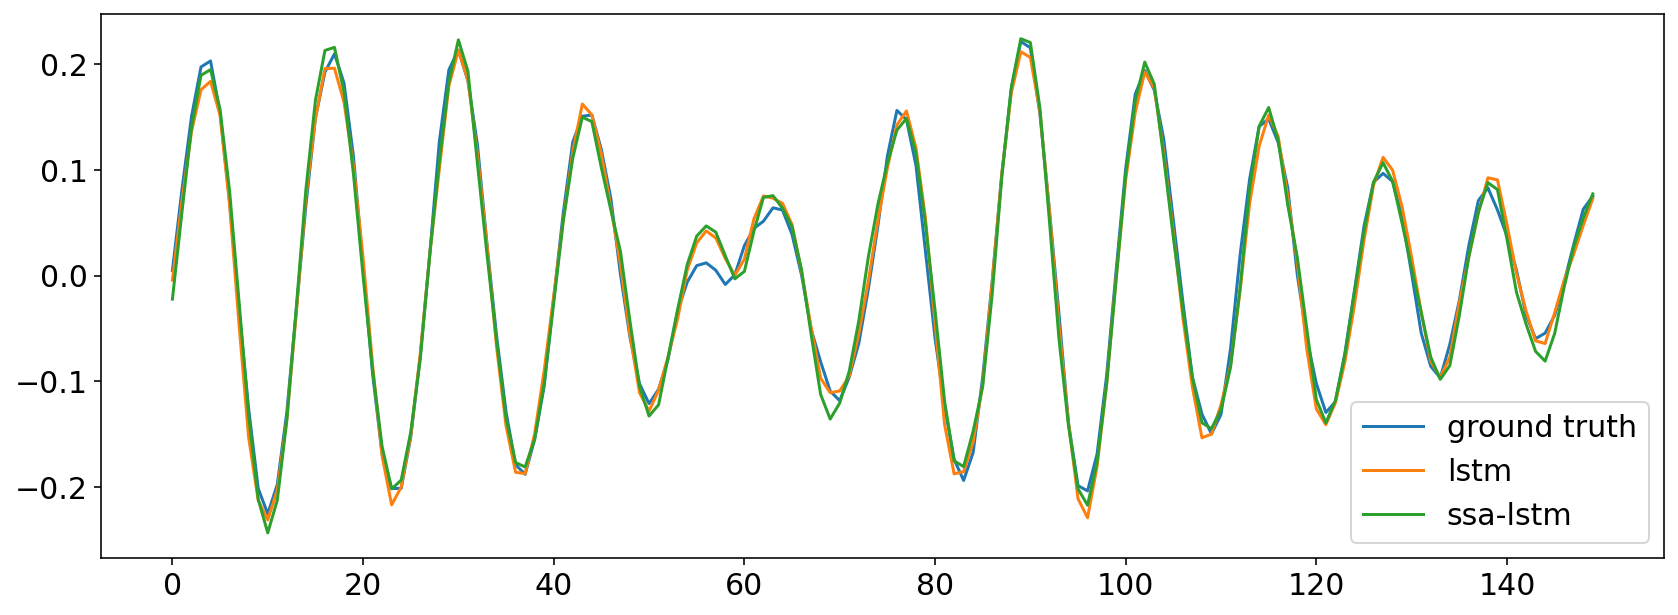

In [222]:
path = 'data/'
folder = 'eop/'
names = ['ann','rnn','gru','lstm']

ser = pd.read_csv('data/ser.csv',)['x'].to_numpy()
x_pole_ts = pd.read_csv('data/x_no_trend.csv',)['ts_x'].to_numpy()[:620]
 
weather7 = np.load('data/weather4.npy', allow_pickle=True)
weather7 = weather7.astype(np.float64)
 
log_ts_signal = np.log(np.arange(1000, 1500+1000))
 
ground_truth = x_pole_ts[-150:] #x_pole_ts[-150:]
 
for name in names:
    dPlotData = pd.read_csv(f'{path+"raw/"}{folder}{name}.csv', sep = ';').sort_values('rmse')
    preds = dPlotData.preds
    dPlotData = pd.read_csv(f'{(path+"SSA/")}{folder}{name}.csv', sep = ';').sort_values('rmse')
    preds_ssa = dPlotData.preds
    
    dPlotData = pd.read_csv(f'{path+"raw/"}{folder}{name}.csv', sep = ';').sort_values('rmse')
    preds = dPlotData.preds
    dPlotData = pd.read_csv(f'{(path+"SSA/")}{folder}{name}.csv', sep = ';').sort_values('rmse')
    preds_ssa = dPlotData.preds
    
    fig, ax = plt.subplots(figsize=(14,5))
    ax.plot(ground_truth, label = 'ground truth')
    ax.plot(list(map(lambda x: float(x), preds.iloc[0].split(' '))), label = name)
    ax.plot(list(map(lambda x: float(x), preds_ssa.iloc[0].split(' '))), label = "ssa-"+name)
    ax.legend()
    plt.show()

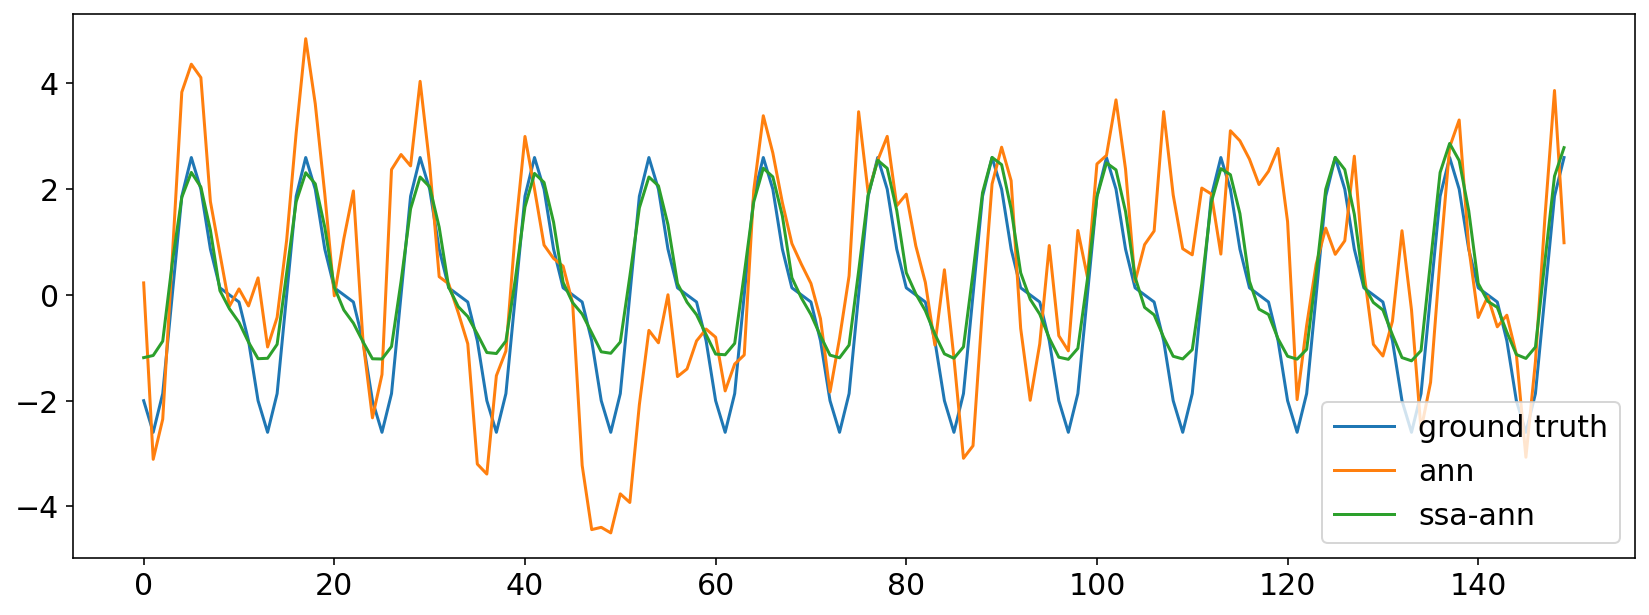

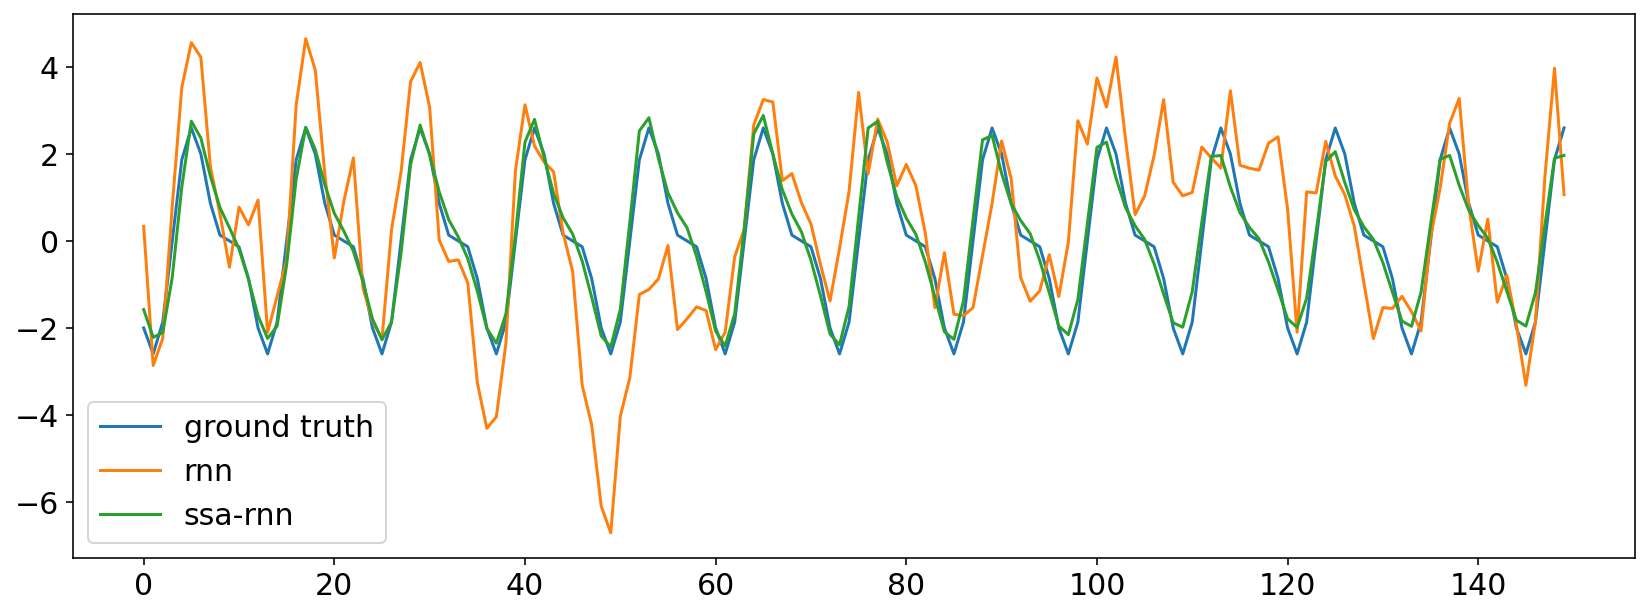

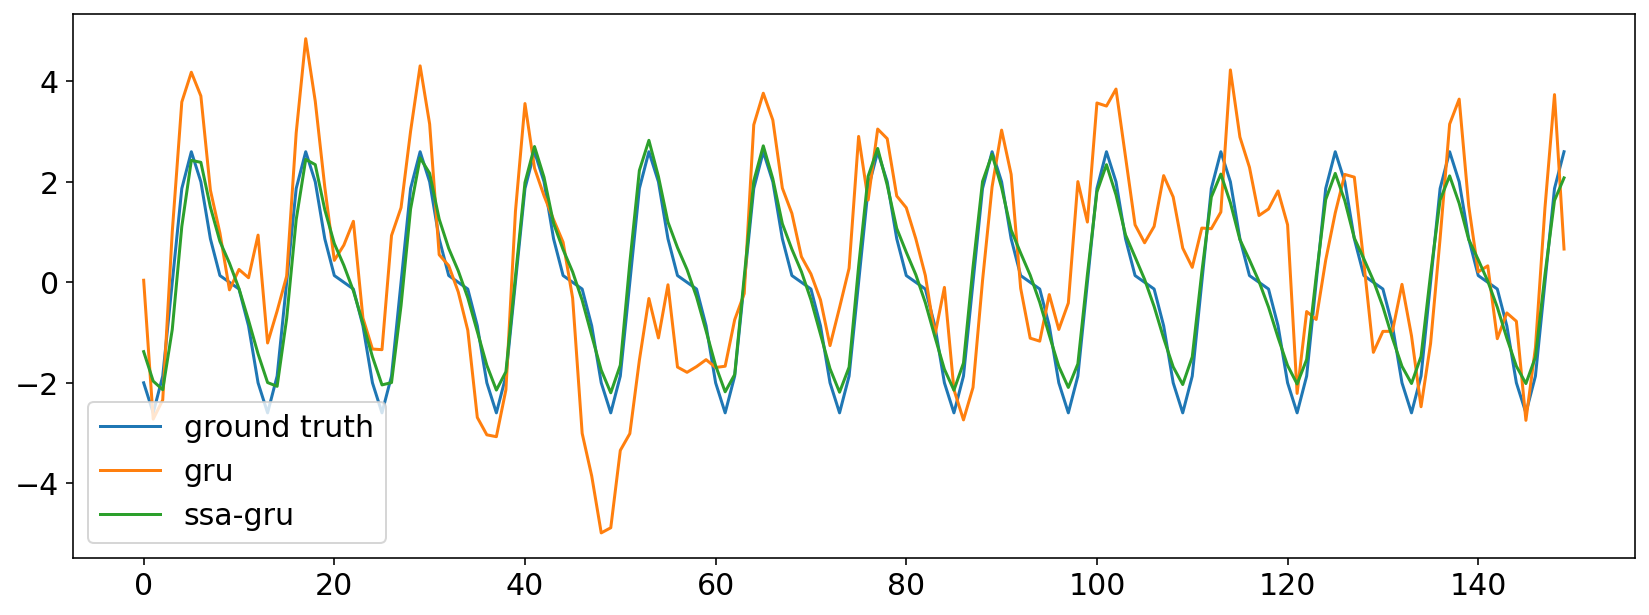

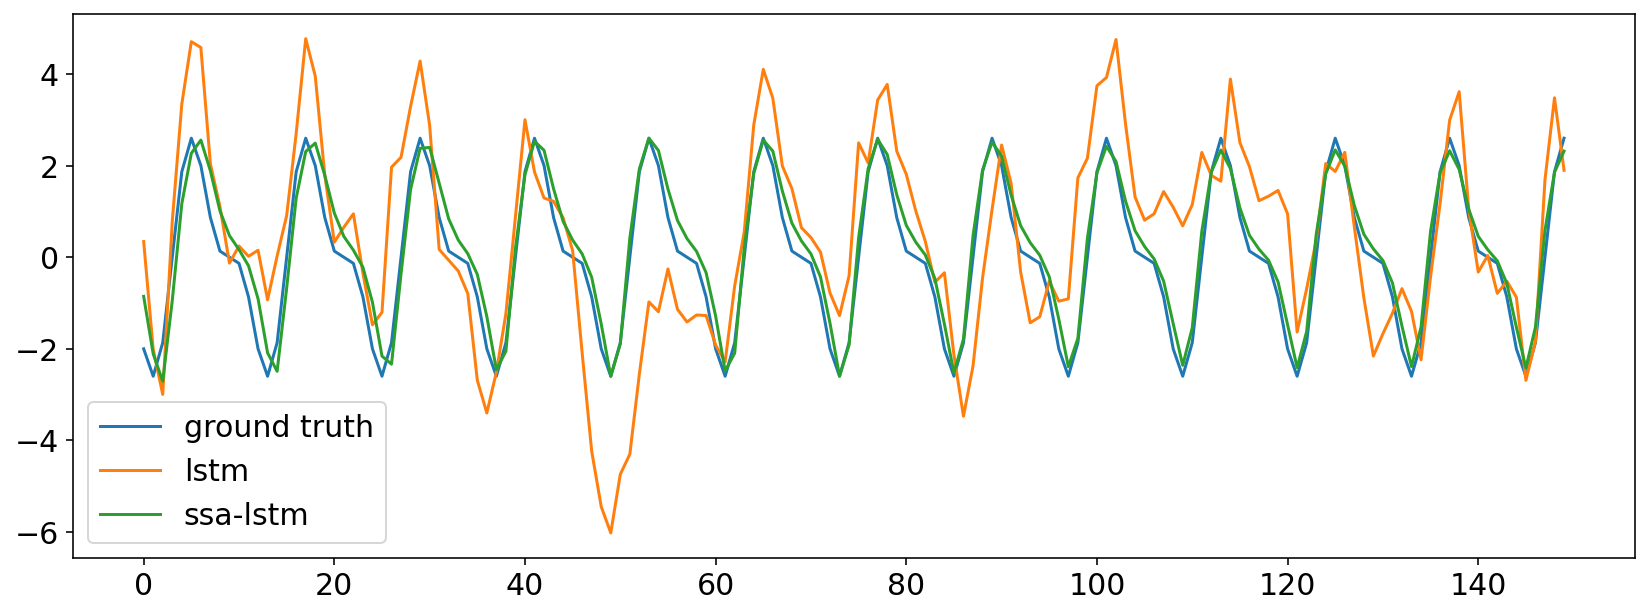

In [114]:
path = 'data/results/'
folder = 'ser/r2LH/'
names = ['ann','rnn','gru','lstm']

ser = pd.read_csv('data/ser.csv',)['x'].to_numpy()
x_pole_ts = pd.read_csv('data/x_no_trend.csv',)['ts_x'].to_numpy()[:620]
ser_sig = pd.read_csv('data/ser_sig.csv',)['x'].to_numpy()

weather7 = np.load('data/weather4.npy', allow_pickle=True)
weather7 = weather7.astype(np.float64)
 
log_ts_signal = np.log(np.arange(1000, 1500+1000))
 
ground_truth = ser_sig[-150:] #x_pole_ts[-150:]
 
for name in names:
    dPlotData = pd.read_csv(f'{path}{folder}{name}.csv', sep = ';').sort_values('rmse')
    preds = dPlotData.preds
    dPlotData = pd.read_csv(f'{(path+"SSA/")}{folder}{name}.csv', sep = ';').sort_values('rmse')
    preds_ssa = dPlotData.preds
    
    dPlotData = pd.read_csv(f'{path}{folder}{name}.csv', sep = ';').sort_values('rmse')
    preds = dPlotData.preds
    dPlotData = pd.read_csv(f'{(path+"SSA/")}{folder}{name}.csv', sep = ';').sort_values('rmse')
    preds_ssa = dPlotData.preds
    
    fig, ax = plt.subplots(figsize=(14,5))
    ax.plot(ground_truth, label = 'ground truth')
    ax.plot(list(map(lambda x: float(x), preds.iloc[0].split(' '))), label = name)
    ax.plot(list(map(lambda x: float(x), preds_ssa.iloc[0].split(' '))), label = "ssa-"+name)
    ax.legend()
    plt.show()

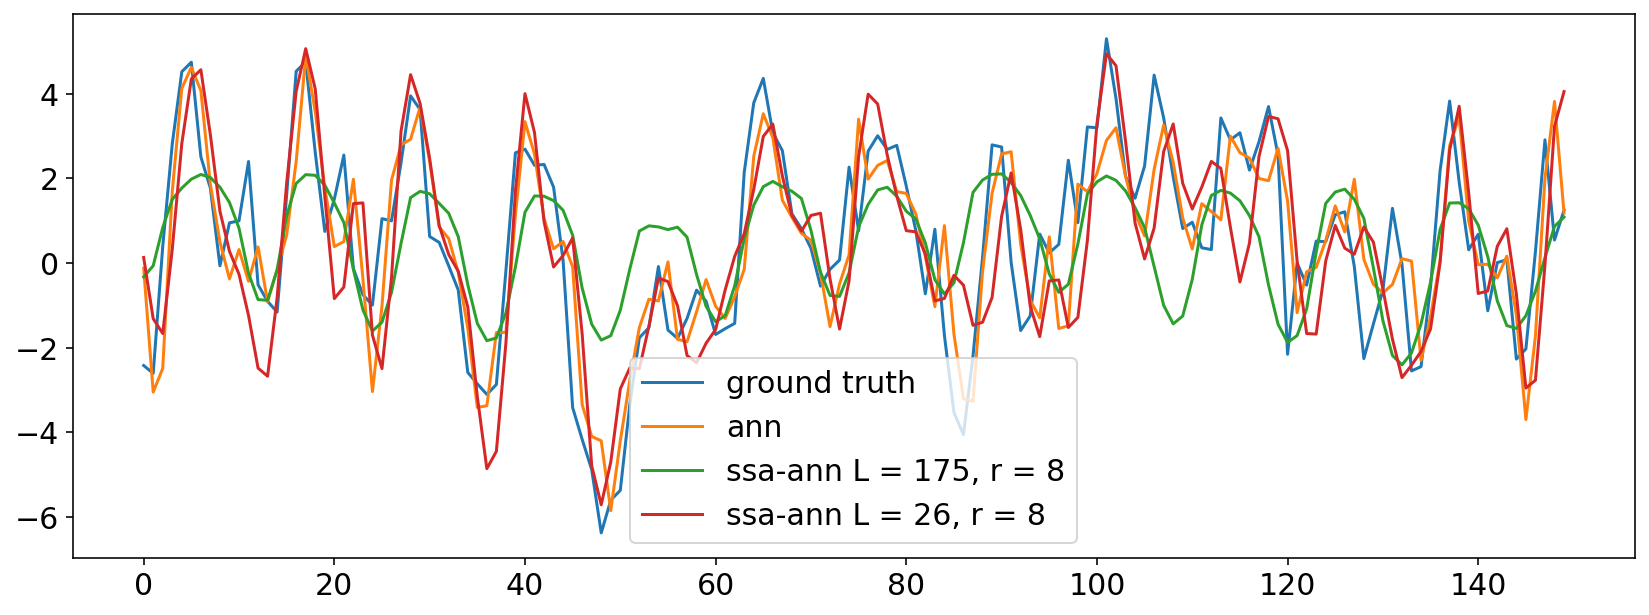

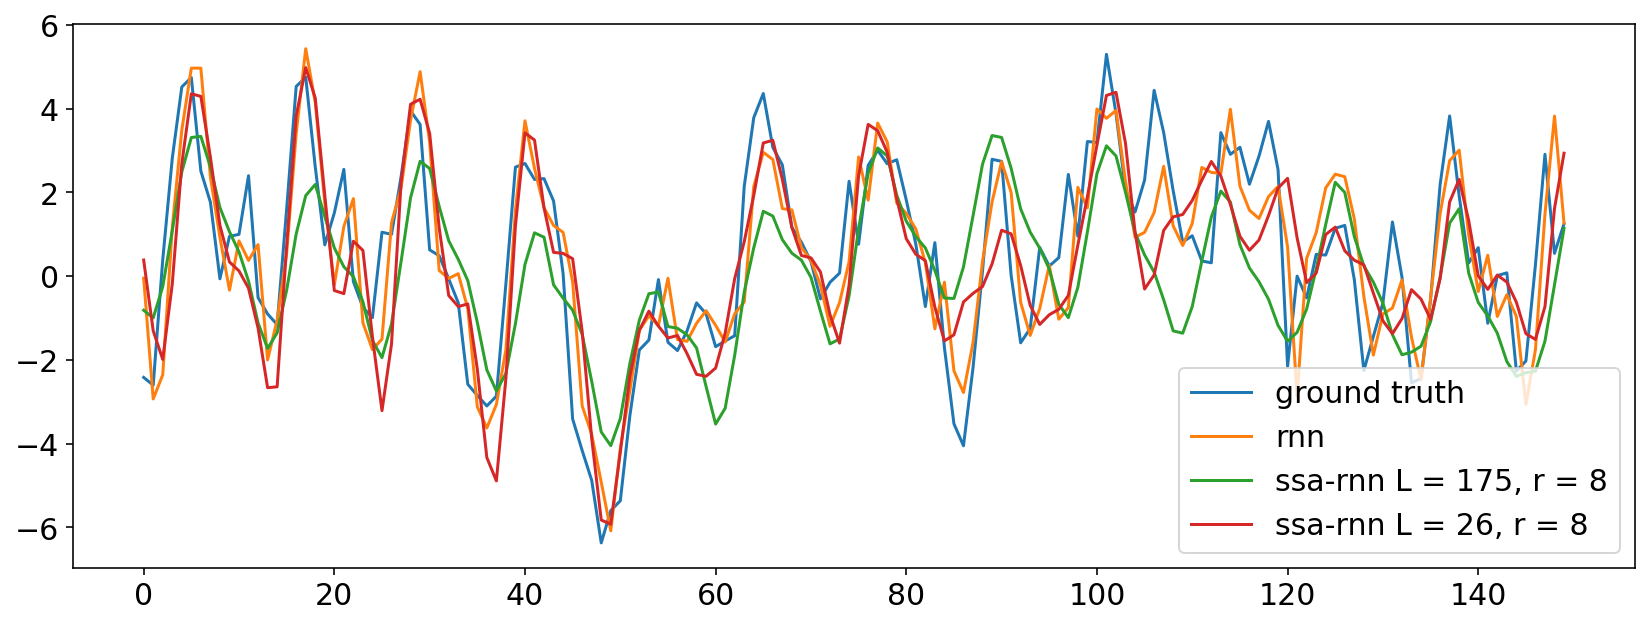

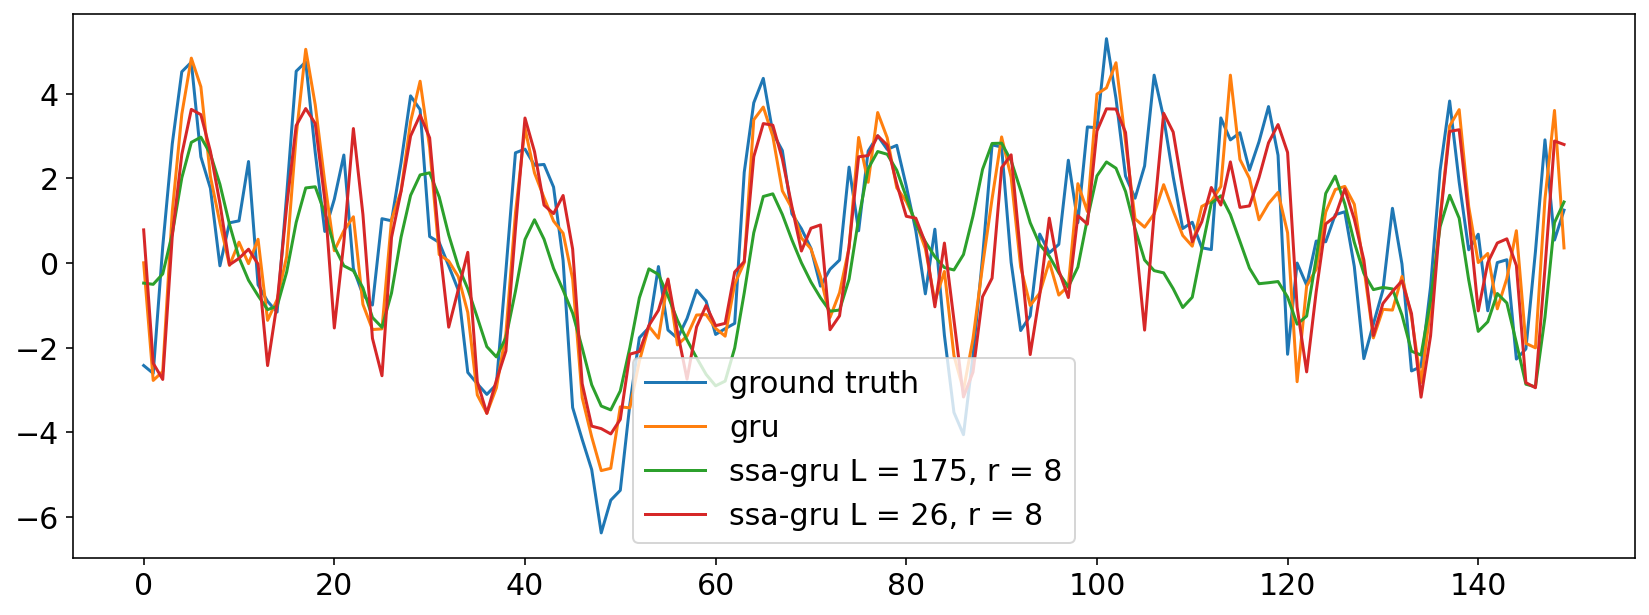

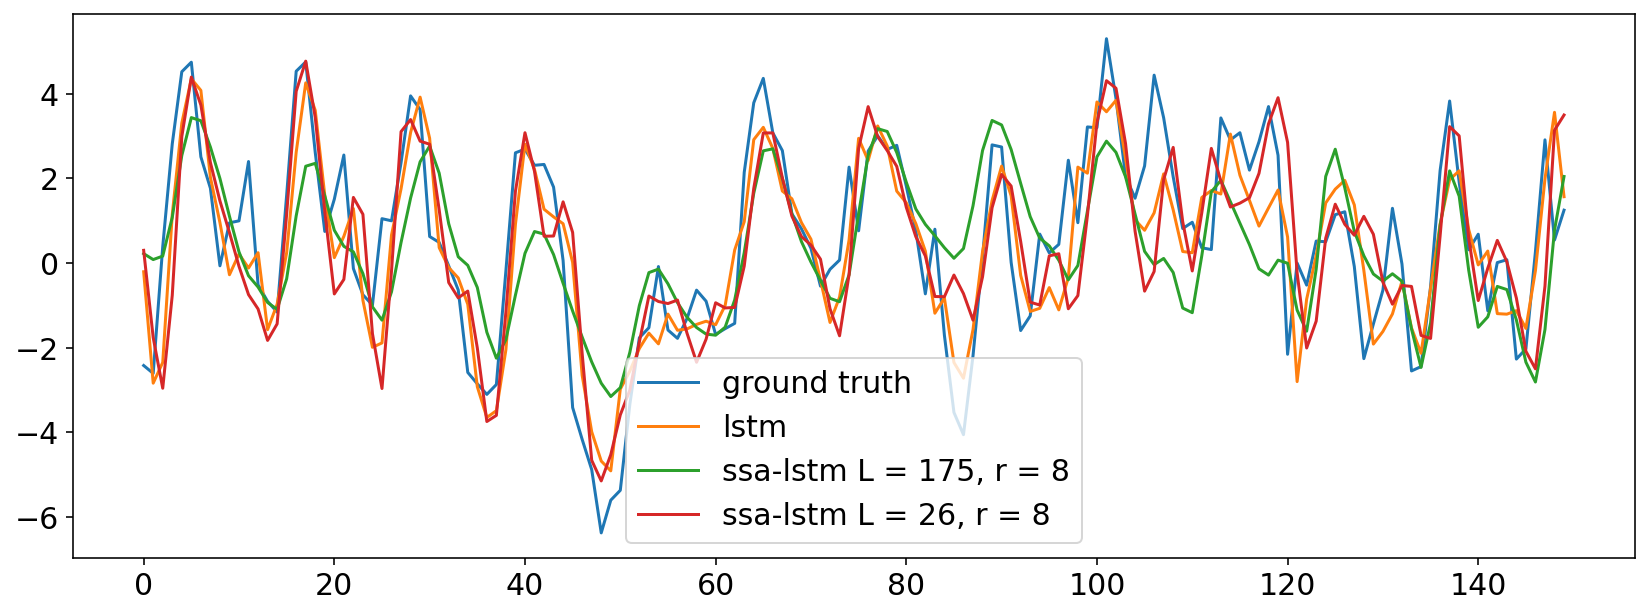

In [56]:
names = ['ann','rnn','gru','lstm']

ser = pd.read_csv('data/ser.csv',)['x'].to_numpy()
 
ground_truth = ser[-150:] #x_pole_ts[-150:]

for name in names:
    dPlotData = pd.read_csv(f'data/raw/impser/{name}.csv', sep = ';').sort_values('rmse')
    preds = dPlotData.preds
    dPlotData = pd.read_csv(f'data/results/SSA/ser/{name}.csv', sep = ';').sort_values('rmse')
    preds_ssa = dPlotData.preds
    dPlotData = pd.read_csv(f'data/SSA/impser/{name}.csv', sep = ';').sort_values('rmse')
    preds_ssa_best = dPlotData.preds
    
    fig, ax = plt.subplots(figsize=(14,5))
    ax.plot(ground_truth, label = 'ground truth')
    ax.plot(list(map(lambda x: float(x), preds.iloc[0].split(' '))), label = name)
    ax.plot(list(map(lambda x: float(x), preds_ssa.iloc[0].split(' '))), label = "ssa-"+name + ' L = 175, r = 8')
    ax.plot(list(map(lambda x: float(x), preds_ssa_best.iloc[0].split(' '))), label = "ssa-"+name + ' L = 26, r = 8')
    ax.legend()
    plt.show()